# 1.K-means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

加载用于K-means算法的数据集

In [2]:
data = loadmat('./data/ex7data2.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [3]:
data['X'].shape

(300, 2)

可视化数据

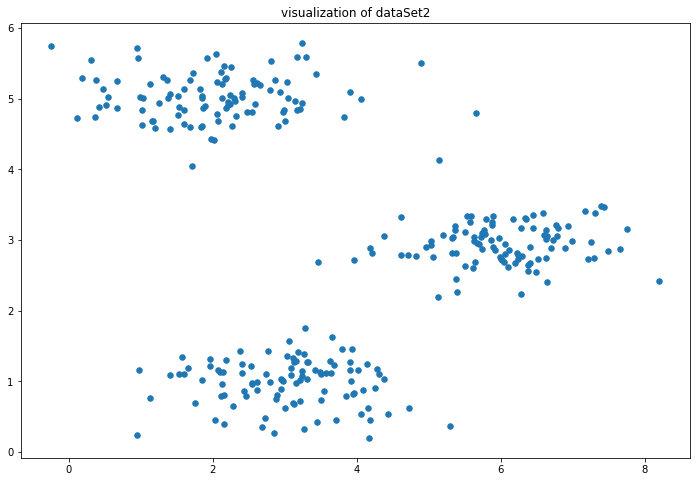

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X'][:,0], data['X'][:,1], s=30)
ax.set_title('visualization of dataSet2')
plt.show()

## Finding closest centroids

In [5]:
def findClosestCentroids(X, Centroids):
    size = X.shape[0]    # 数据集样本个数
    k = Centroids.shape[0]  # 聚簇个数
    output = np.zeros(size, dtype=np.int32)
    
    for i in range(size):
        idx = np.sum((X[i:i+1,:] - Centroids) ** 2, axis=1).argmin()
        output[i] = idx
    return output   

In [6]:
def computeCentroids(X, labels, k):
    '''
    labels存储每一样本所属聚簇类
    '''
    Centroids = np.zeros((k,X.shape[1]), dtype=np.float64)
    for i in range(k):
        Centroids[i,:] = X[np.where(labels == i)].mean(axis=0)  # 得到第i聚簇类的平均值
    return Centroids

指定初始k个聚簇中心，此处k=3，且选取第0，1，2个数据点

In [7]:
X = data['X']
X.shape, type(X)

((300, 2), numpy.ndarray)

In [8]:
initialCentroids = X[:3,:]
initialCentroids

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ]])

尝试50次迭代过程，绘制出每一次迭代后的图像

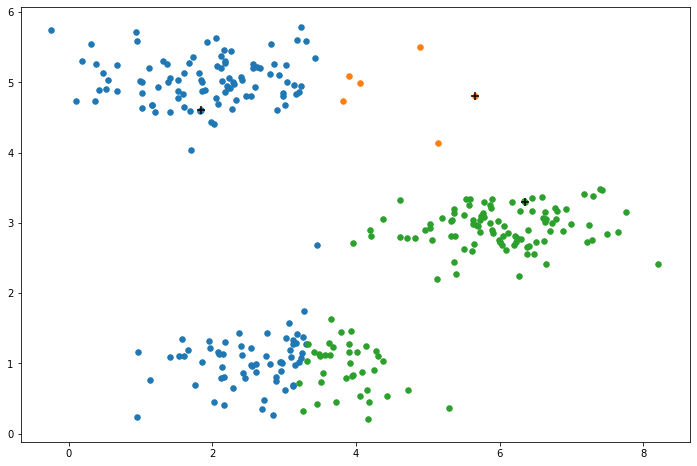

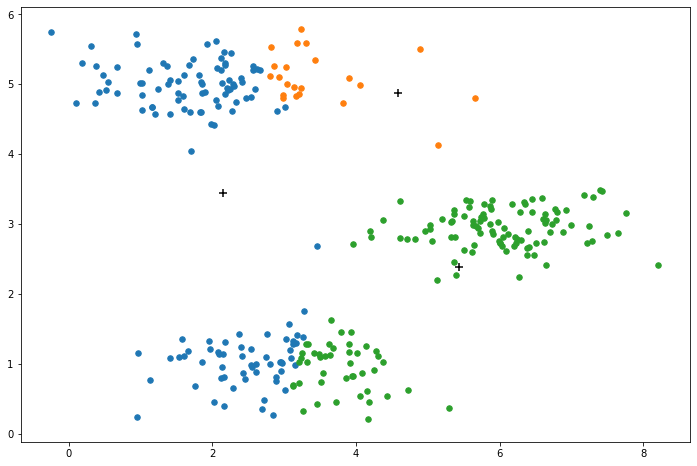

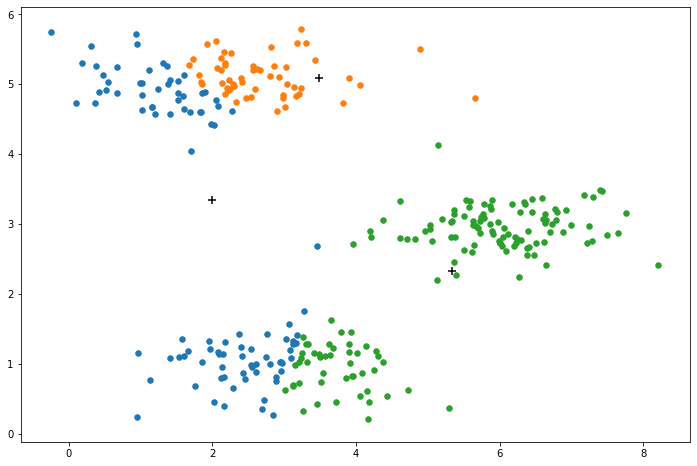

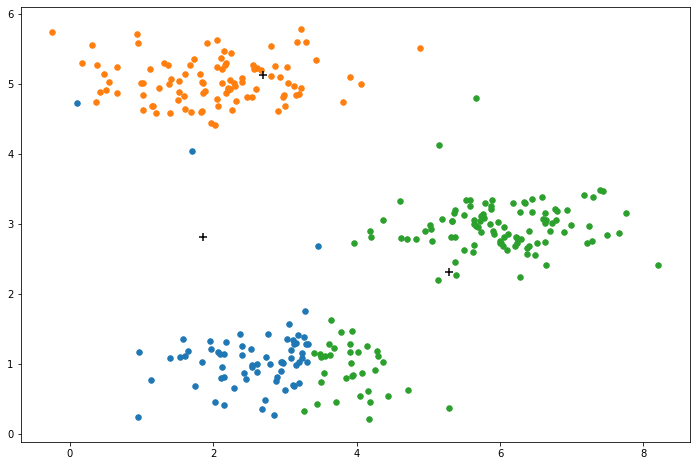

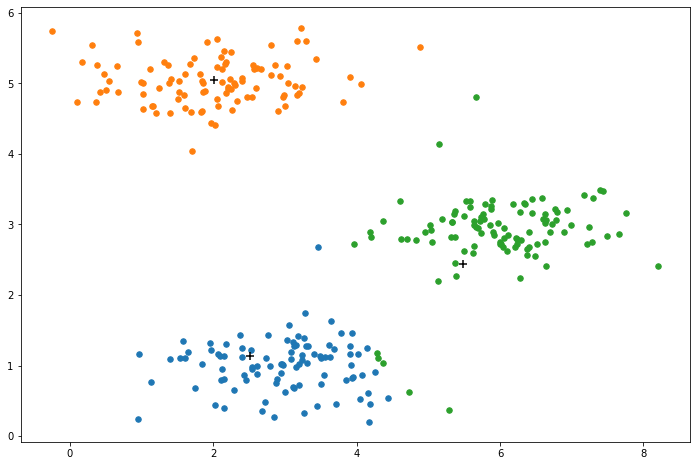

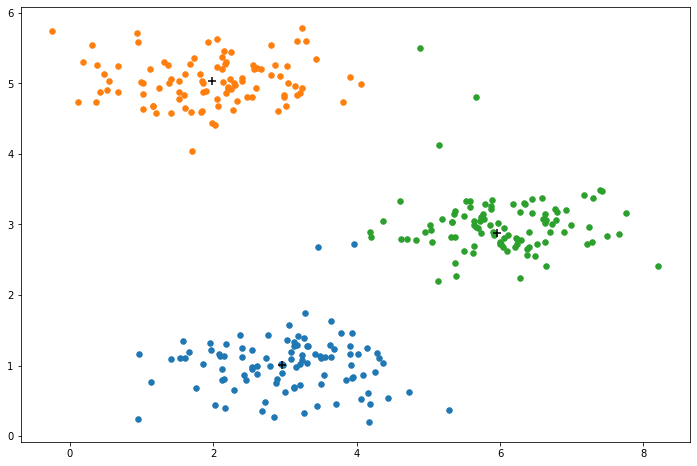

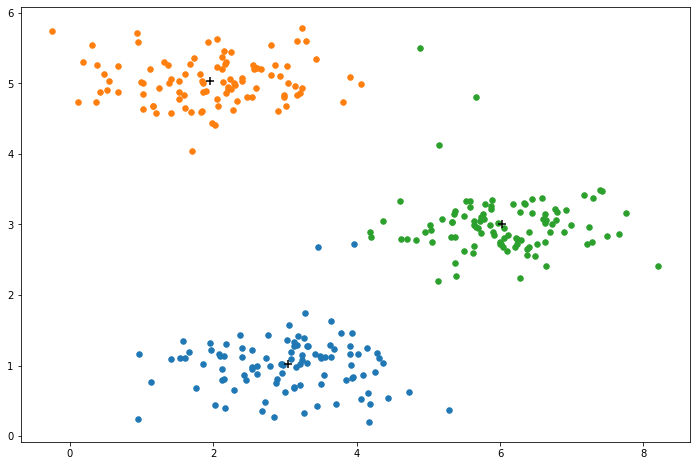

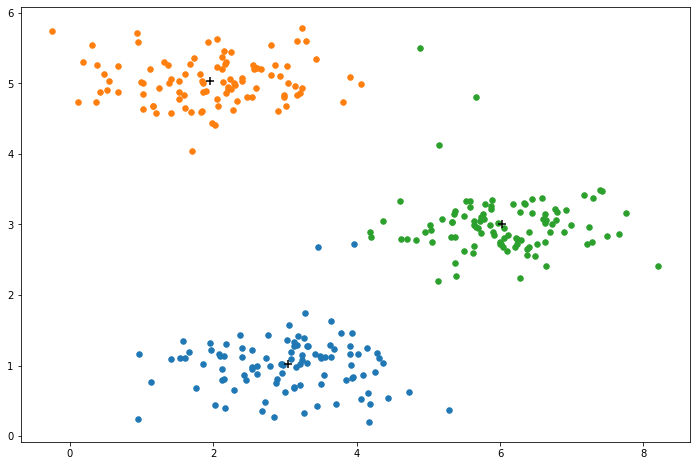

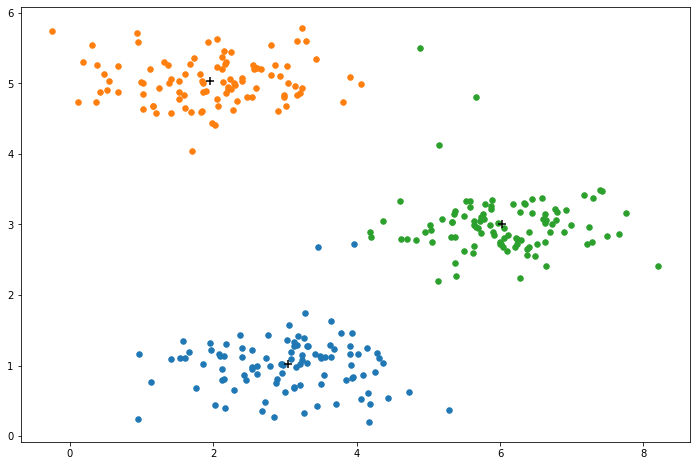

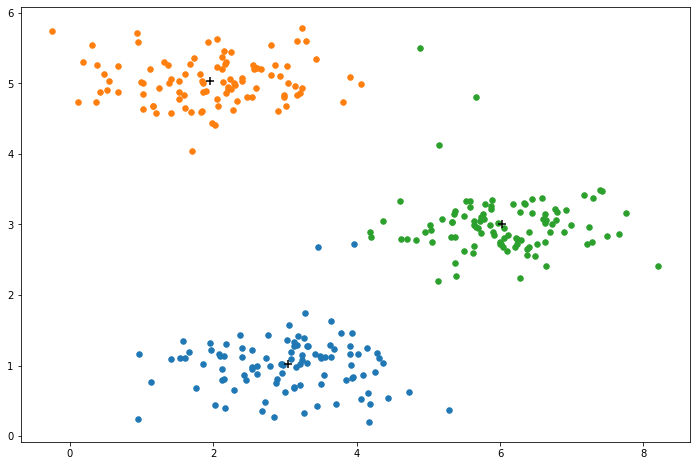

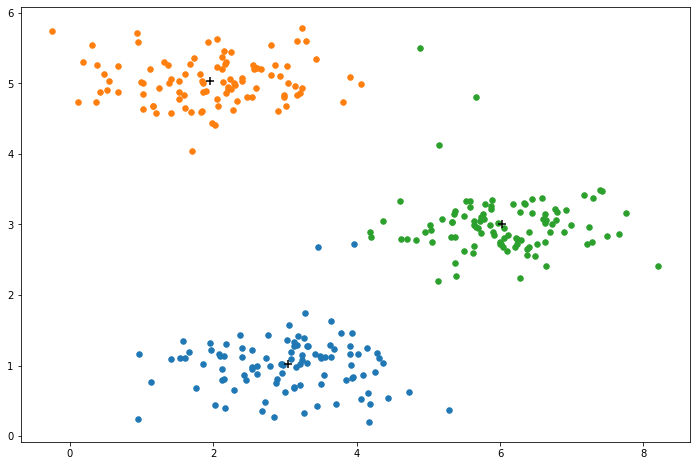

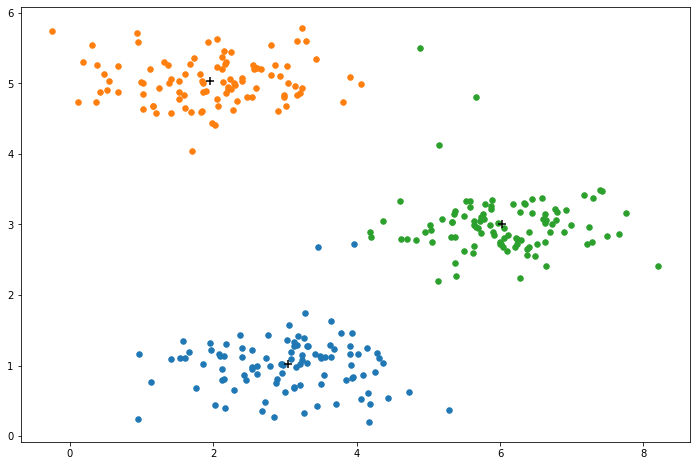

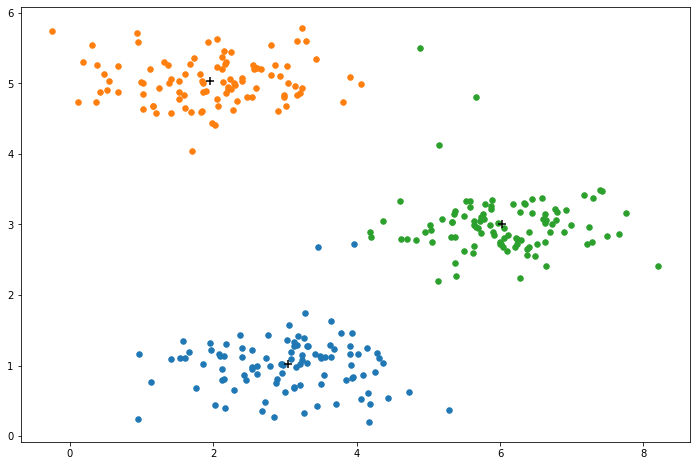

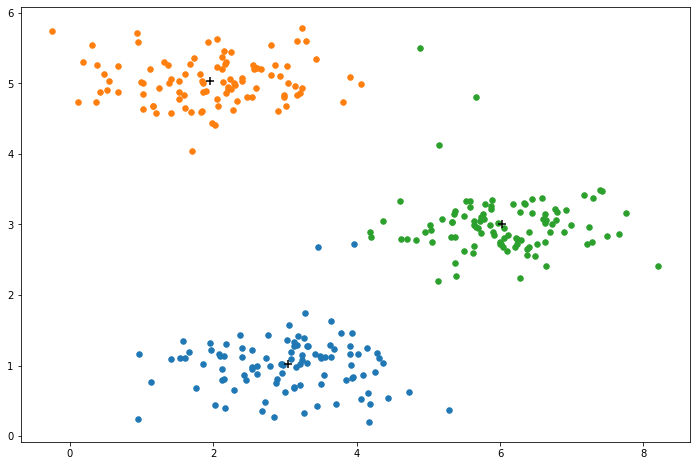

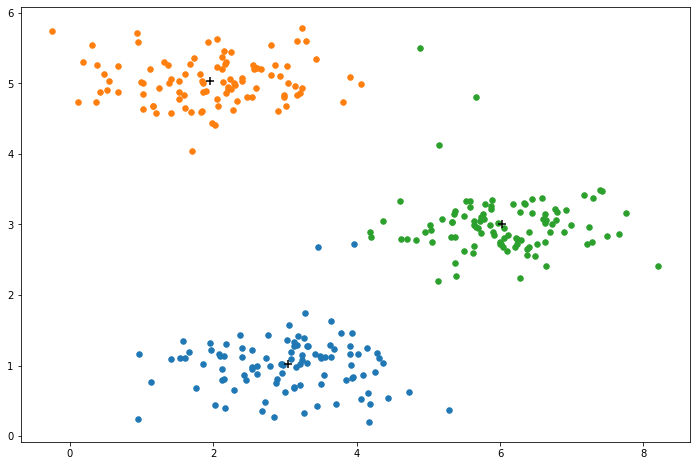

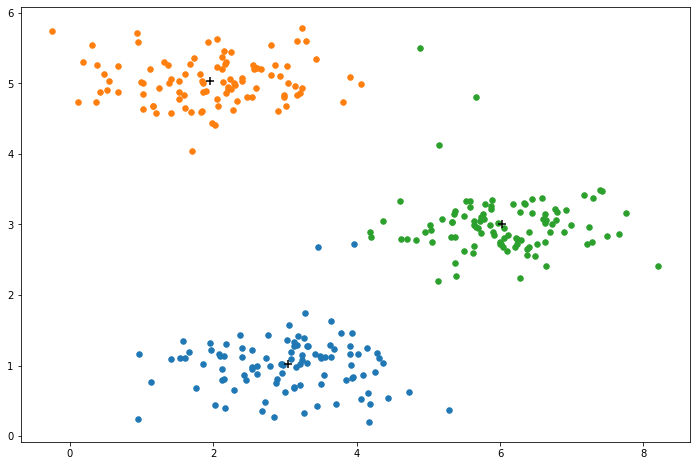

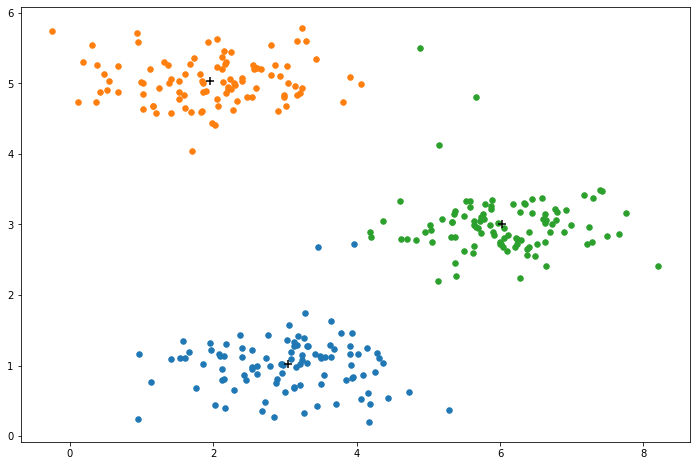

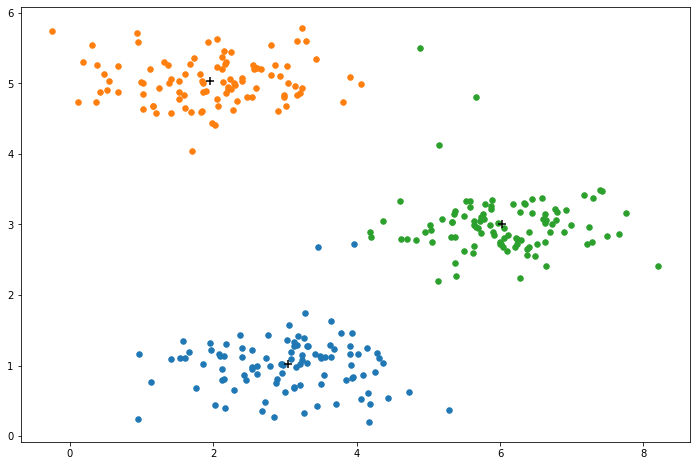

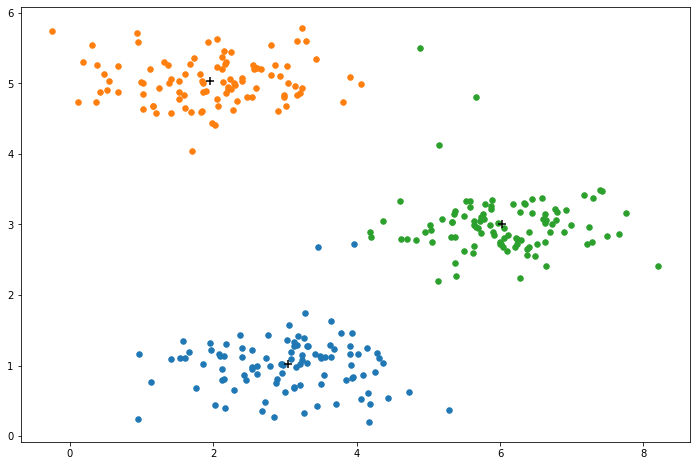

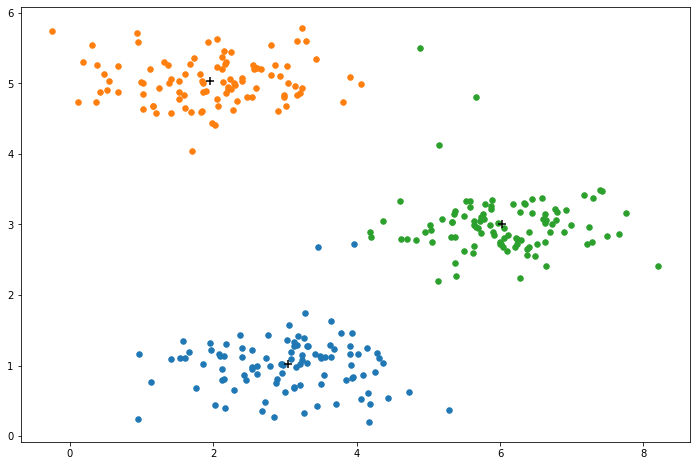

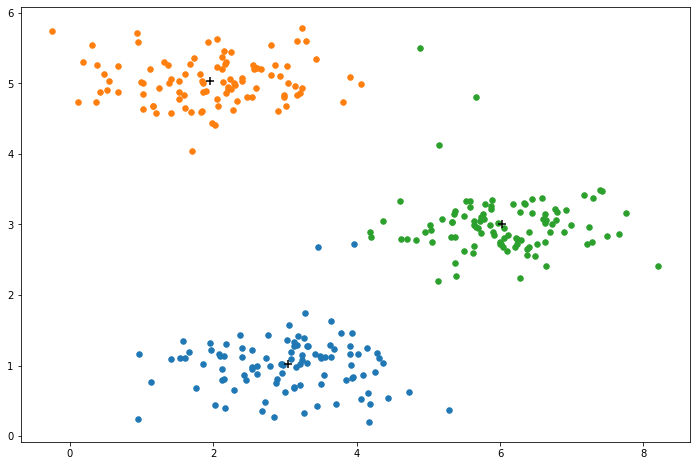

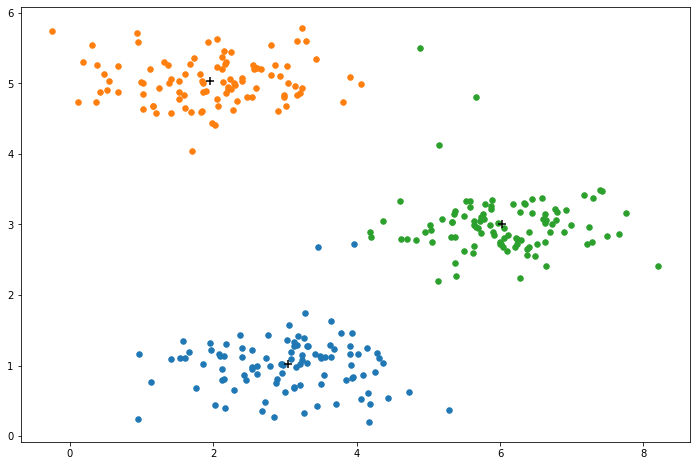

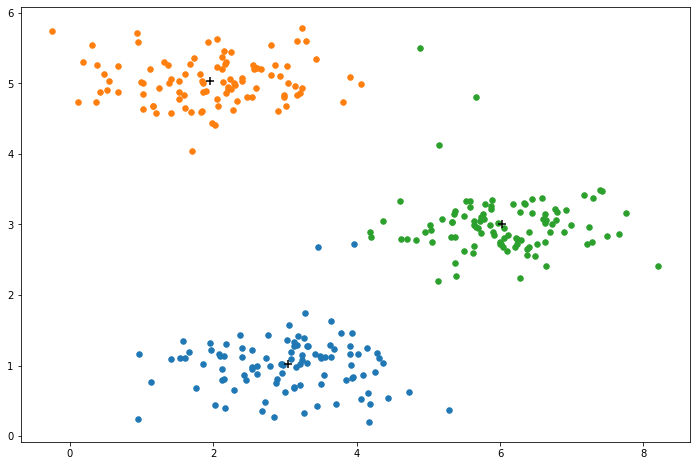

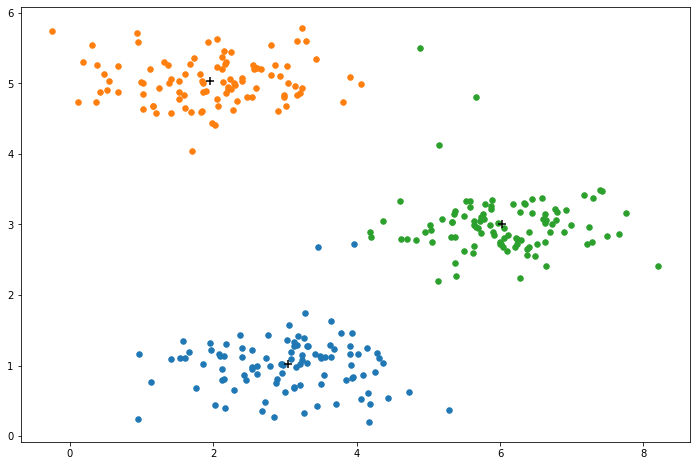

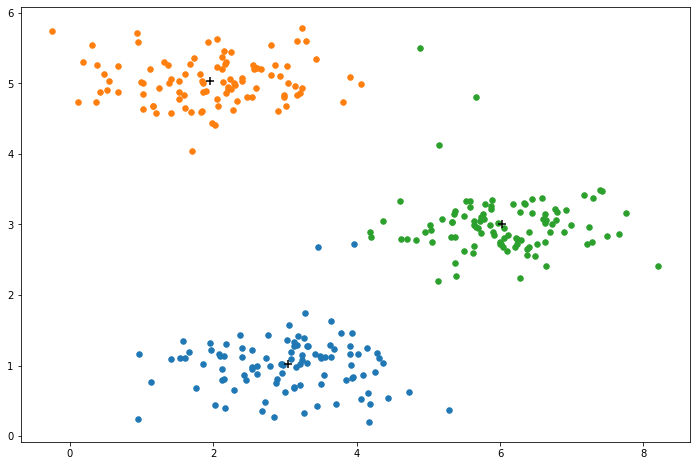

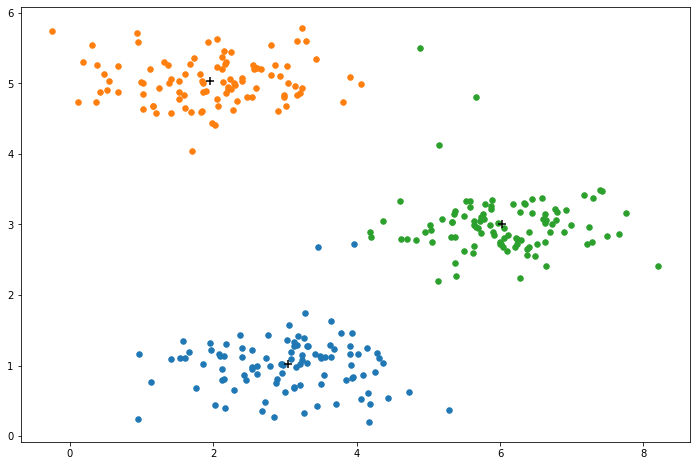

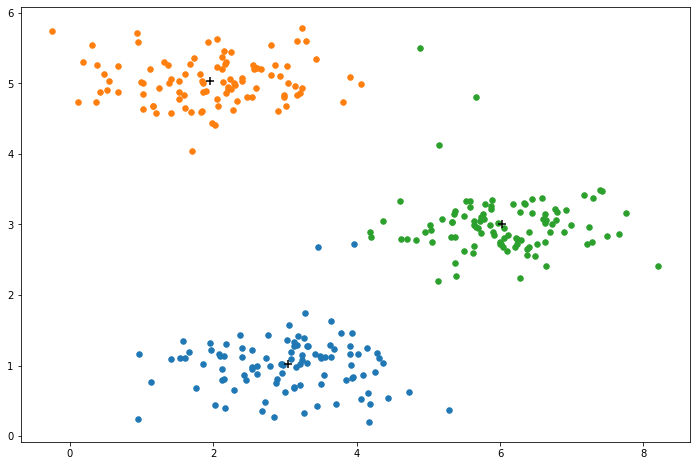

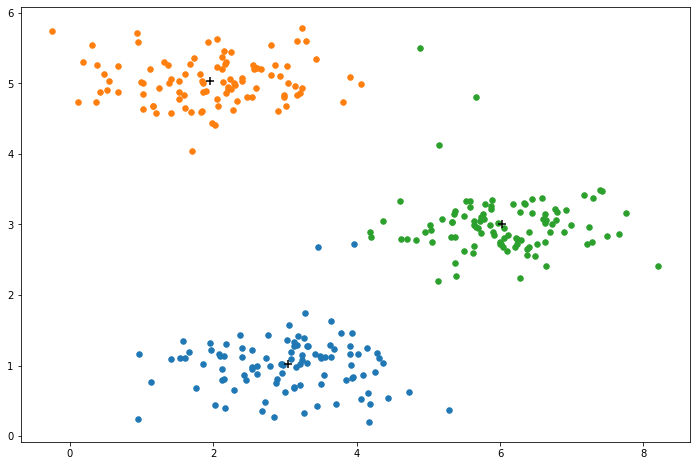

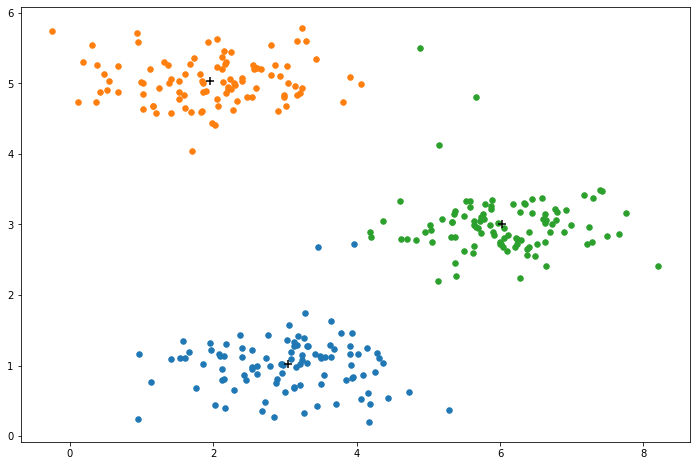

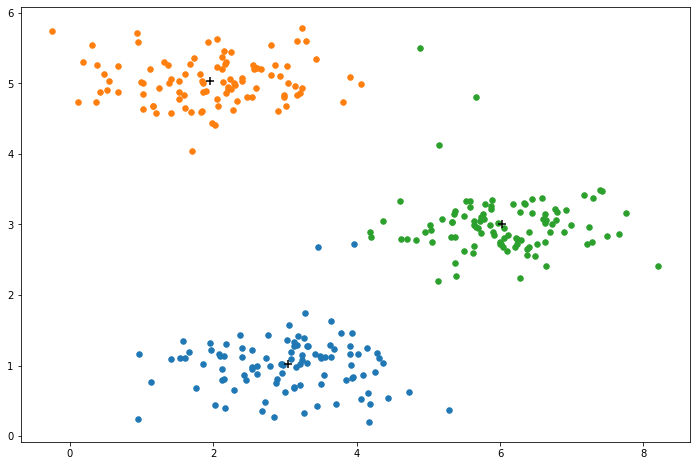

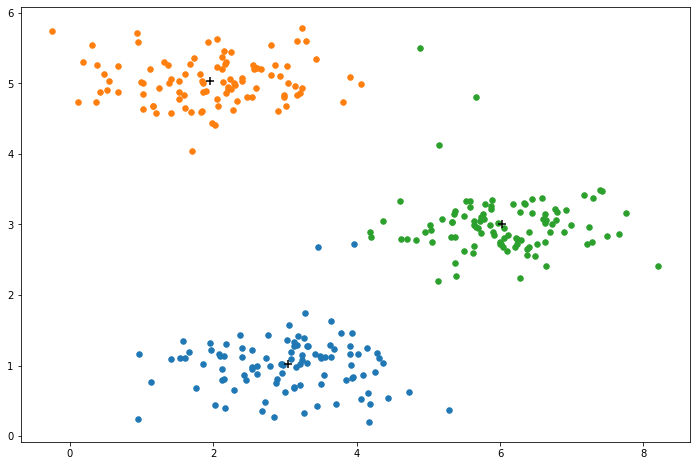

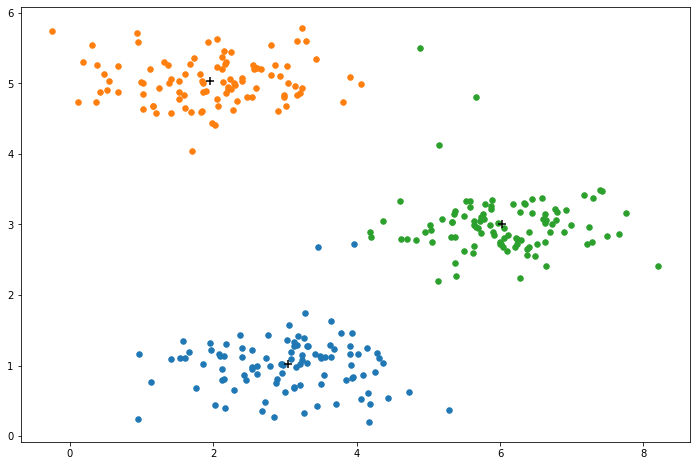

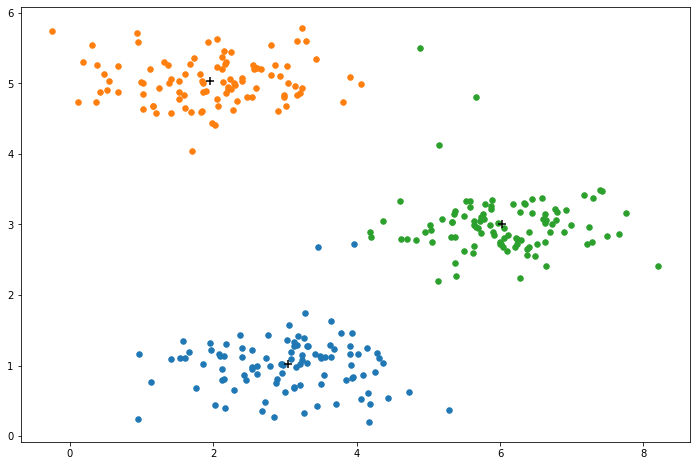

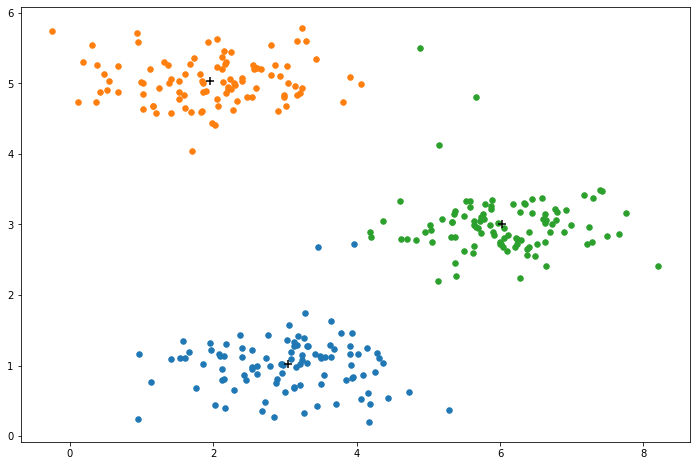

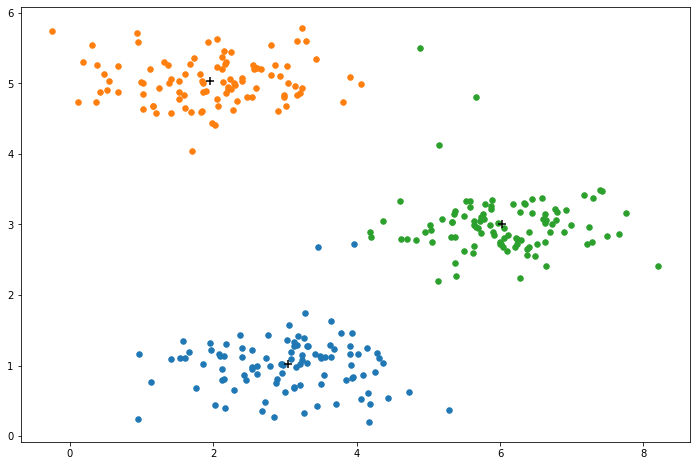

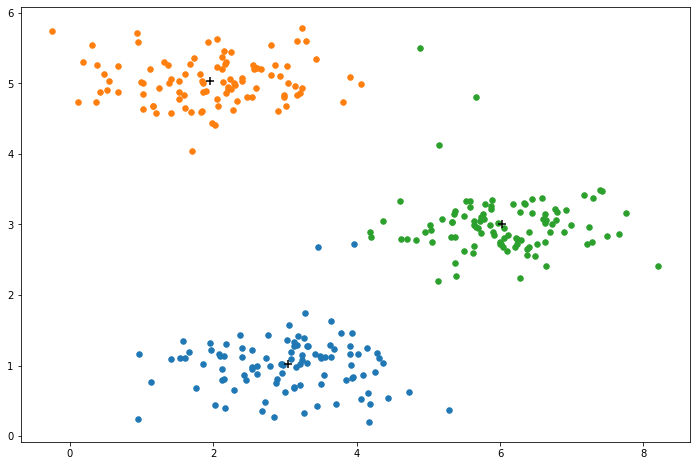

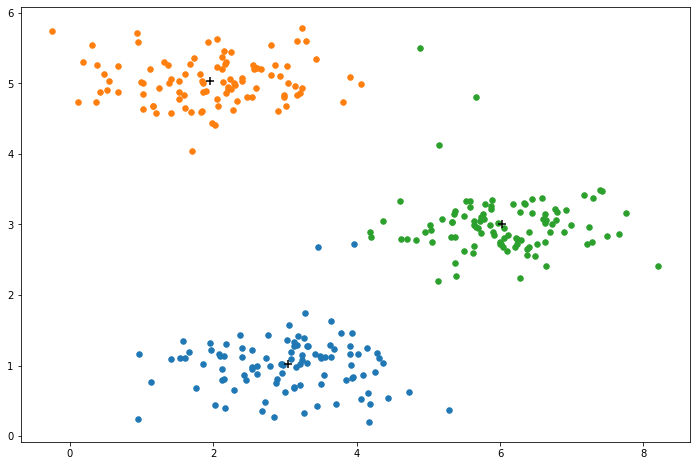

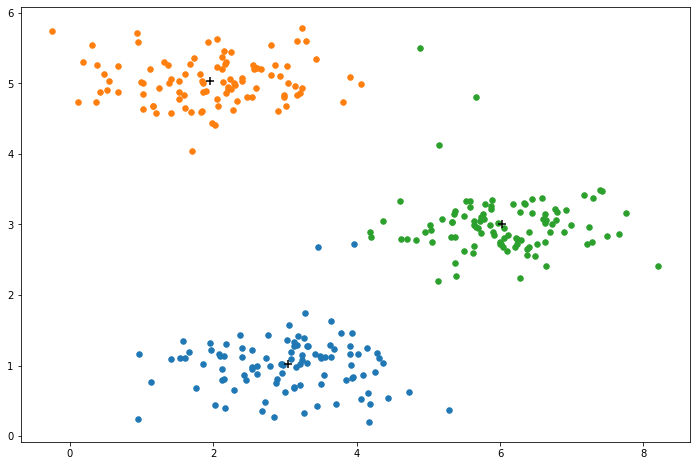

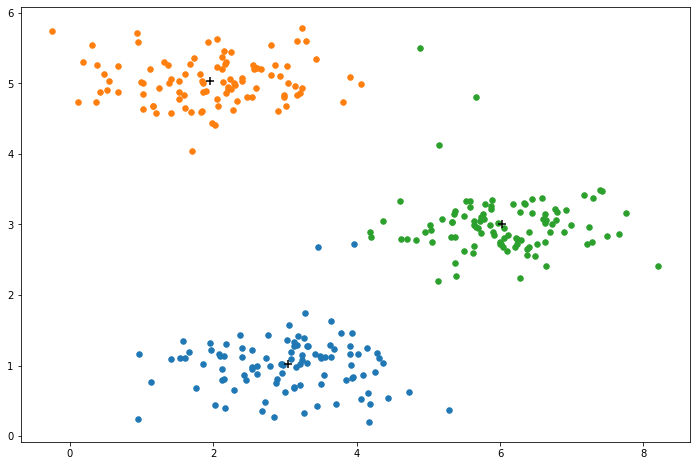

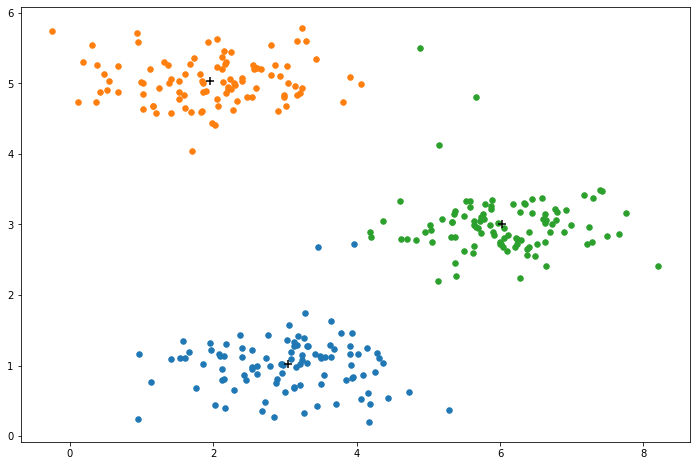

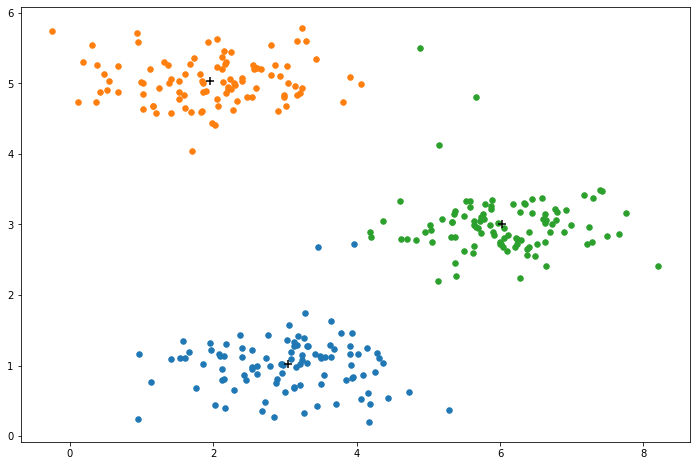

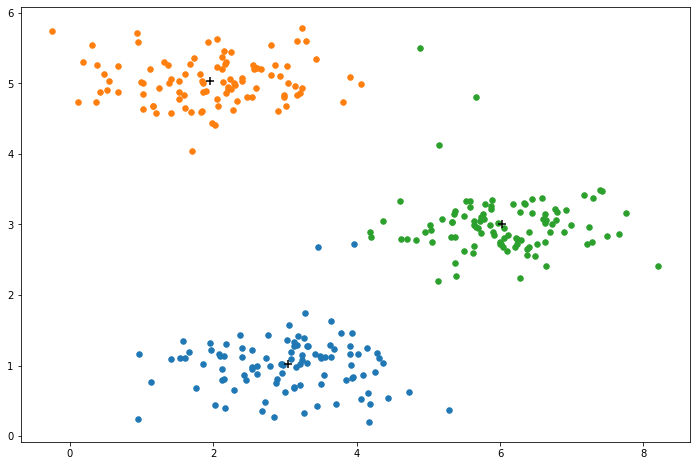

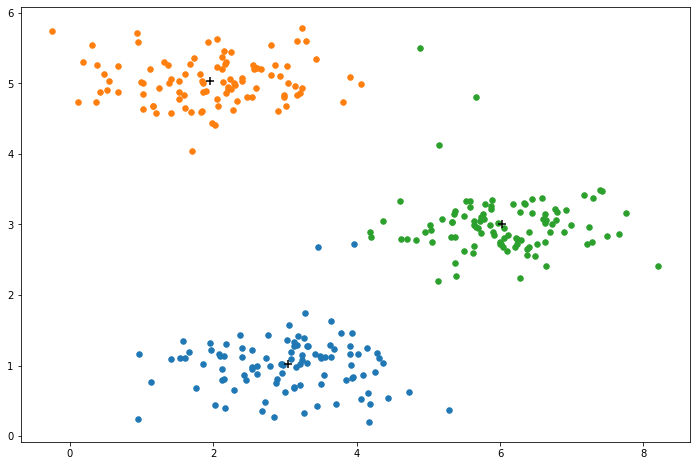

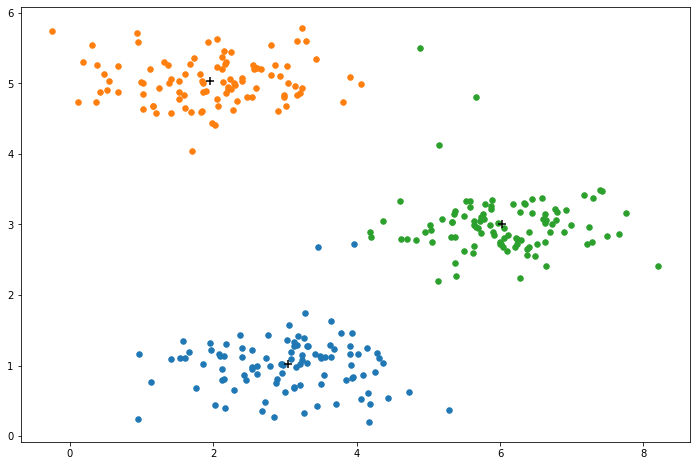

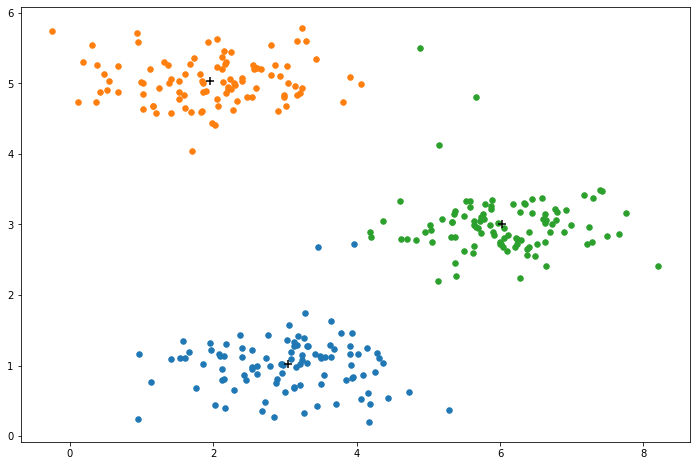

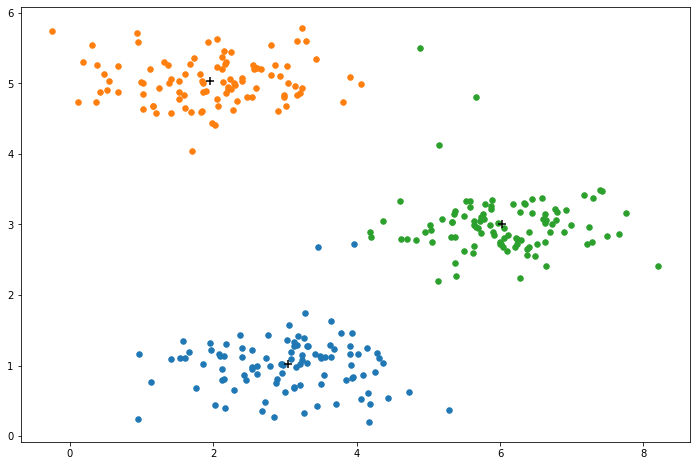

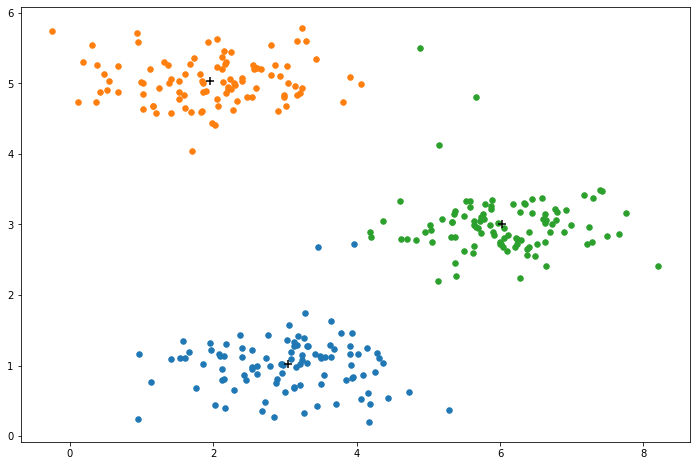

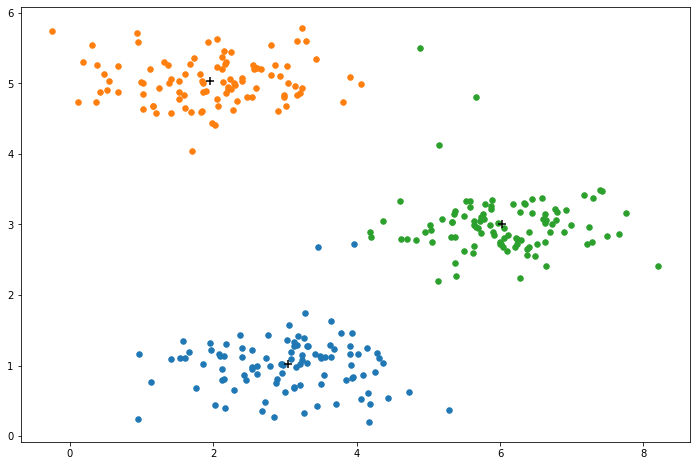

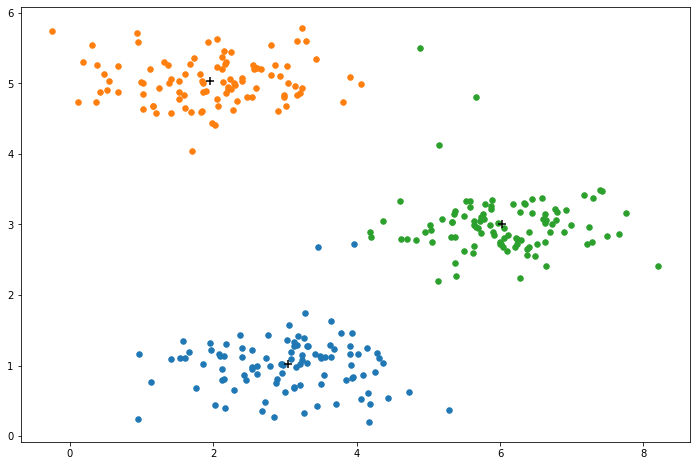

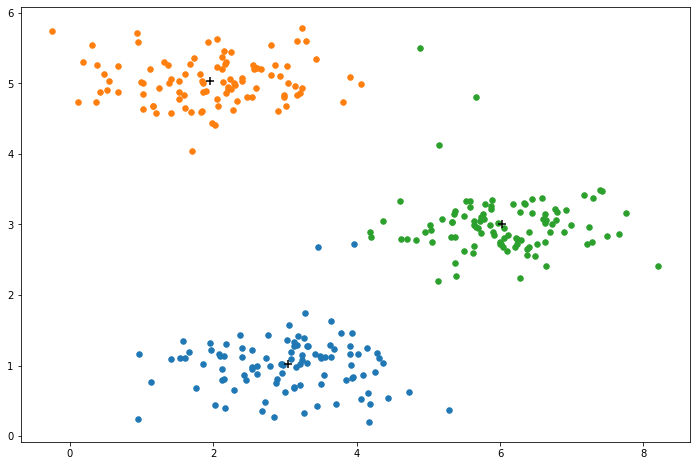

In [9]:
import time

iters = 50
k = 3
Centroids = initialCentroids

for i in range(iters):
    
    
    # Cluster assignment
    labels = findClosestCentroids(X, Centroids)
    # after get the labels, we already know where the data points are allocated
    fig, ax = plt.subplots(figsize=(12, 8))
    for j in range(k):
        ax.scatter(X[np.where(labels == j)][:,0],X[np.where(labels == j)][:,1],s=30)
    ax.scatter(Centroids[:,0],Centroids[:,1],s=80,marker='+',c='k')
    plt.show()
    # Modify Centroids
    Centroids = computeCentroids(X, labels, k)
    time.sleep(1)

通过以上图片观察到效果还算不错

下面采取随机选取初始簇心的方式实现K-means算法

In [10]:
def kMeansInitCentroids(X, k):
    '''
    Initialize the centroids to be random examples
    '''
    randomList = np.random.choice([i for i in range(X.shape[0])], k, replace=False)
    return X[randomList]

[[6.88575584 2.88845269]
 [3.23197916 4.93989405]
 [3.06192918 1.5719211 ]]


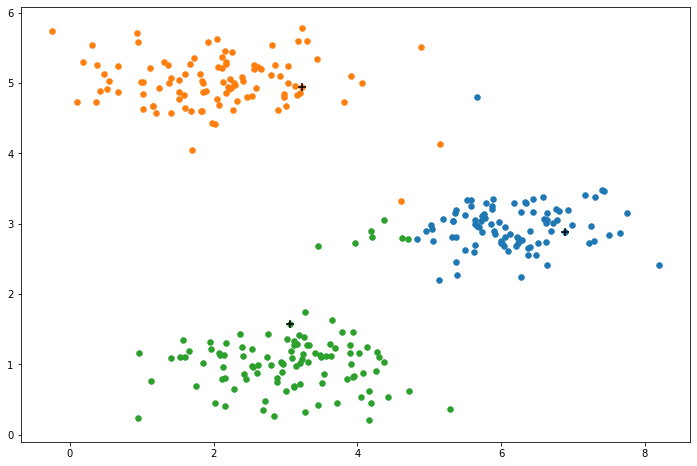

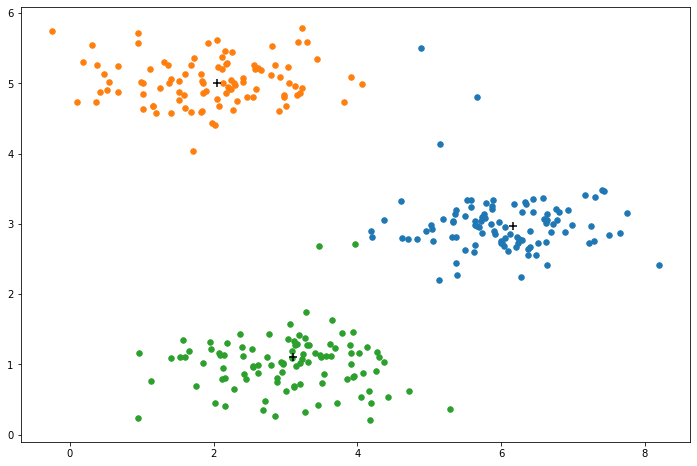

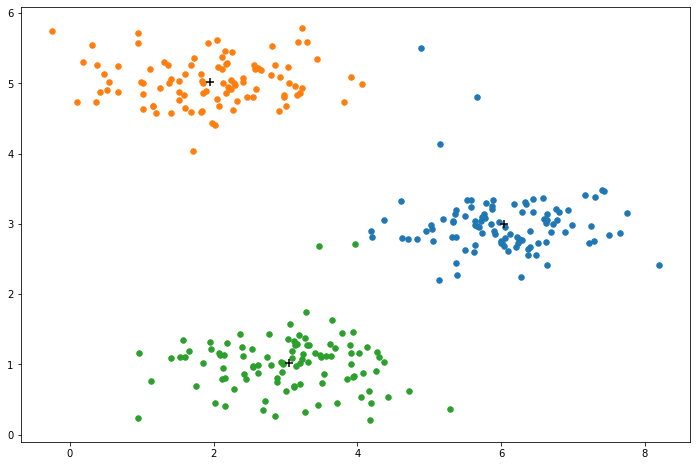

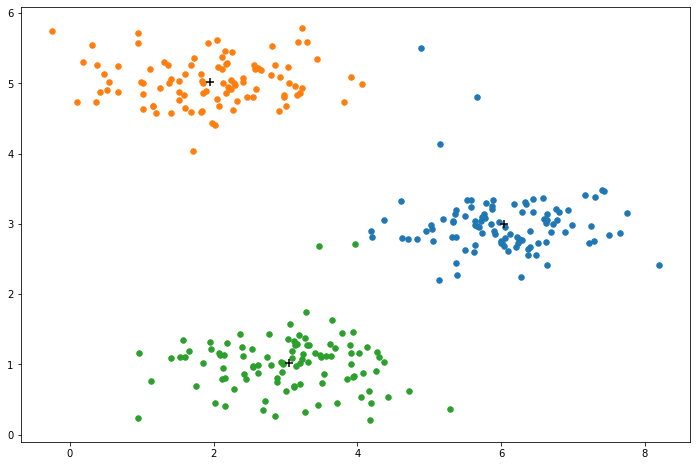

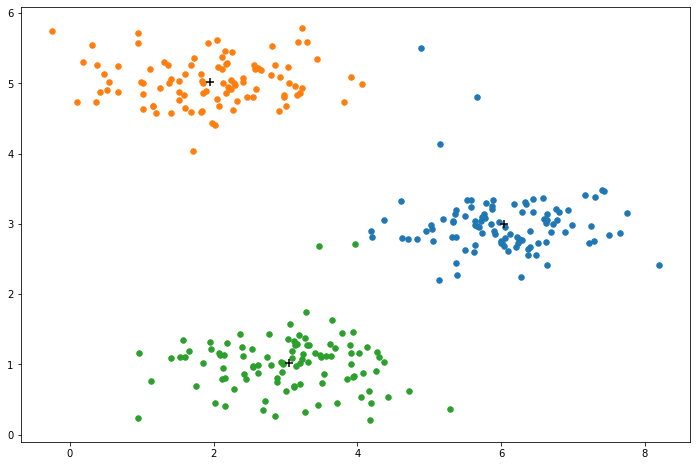

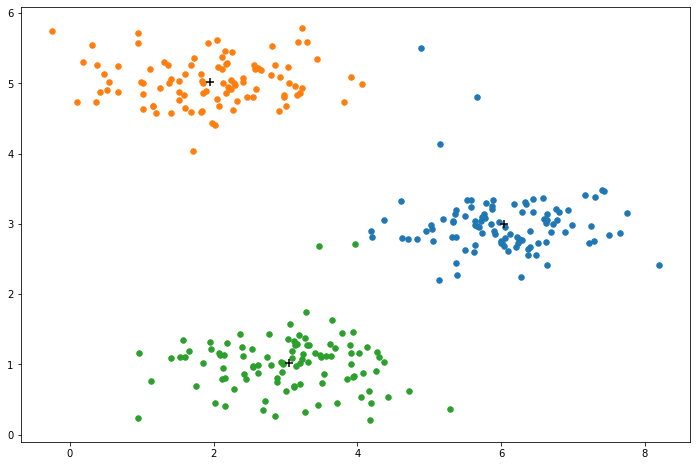

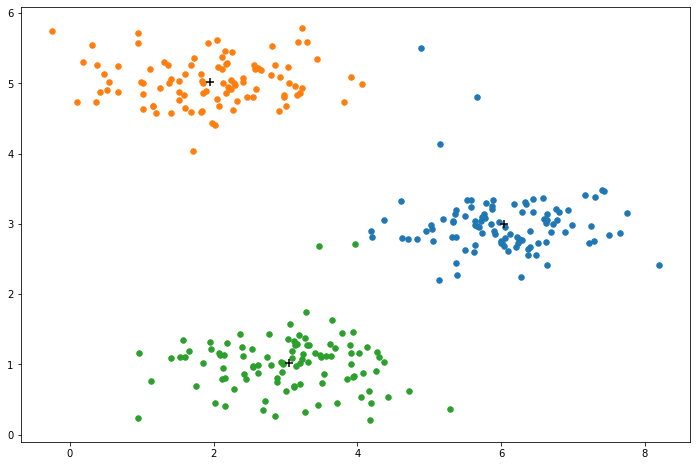

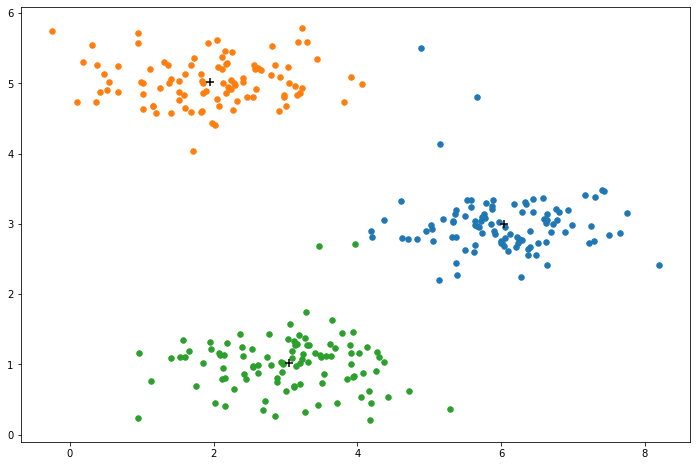

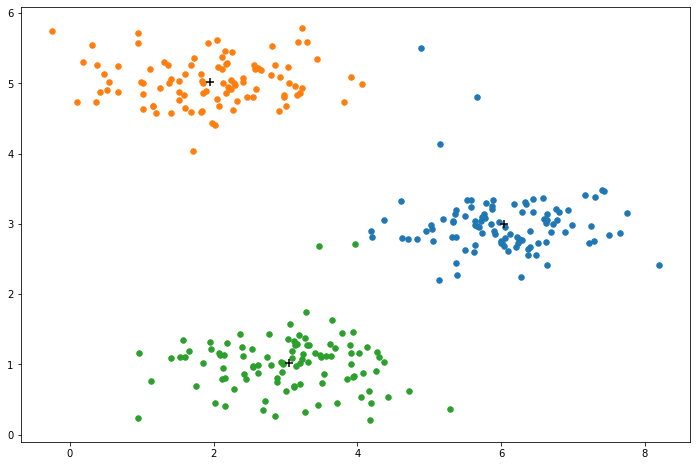

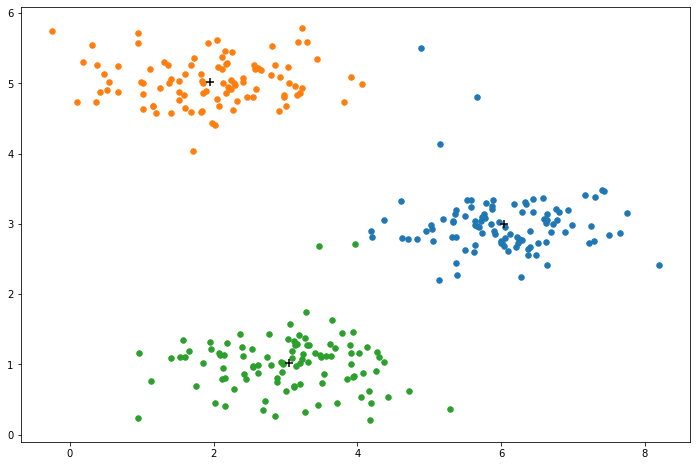

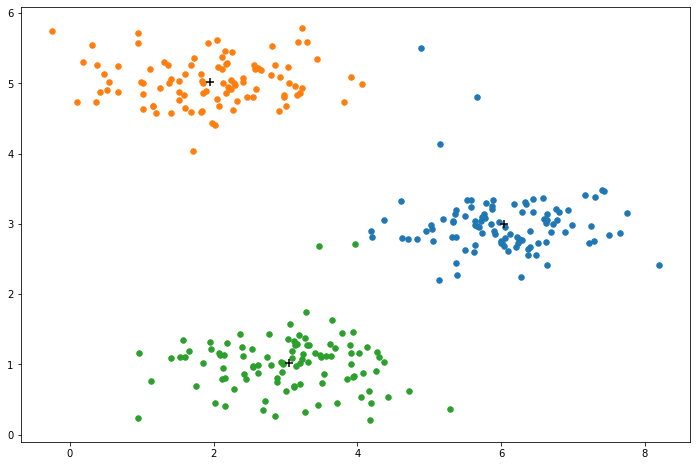

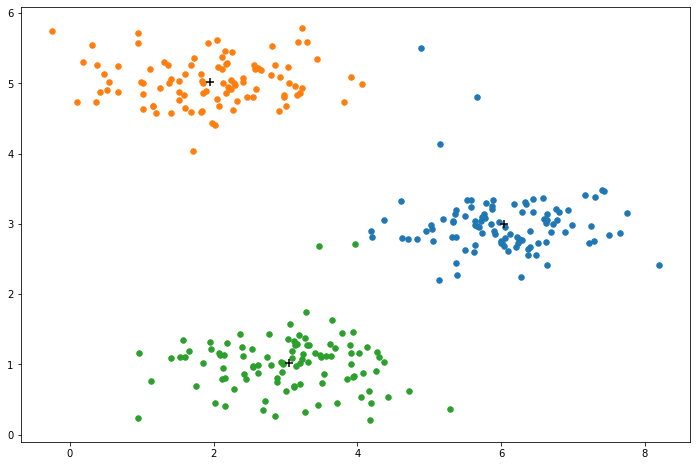

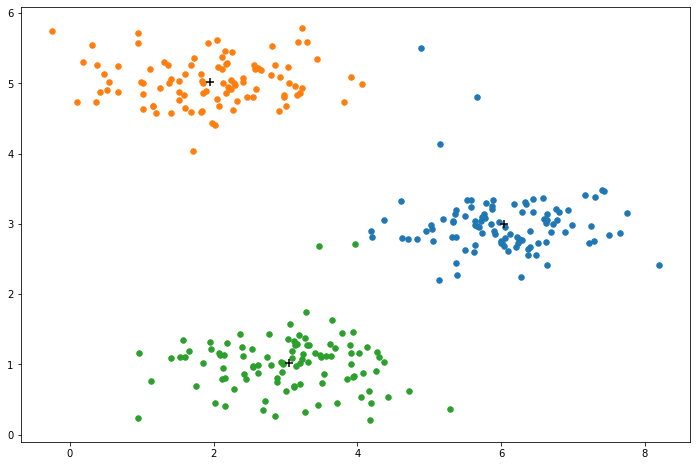

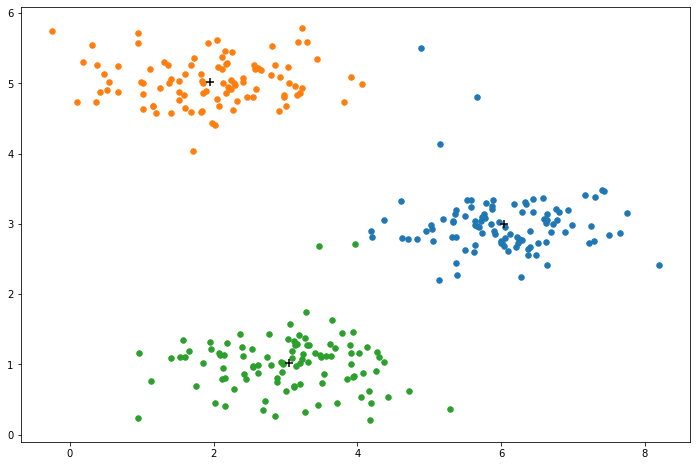

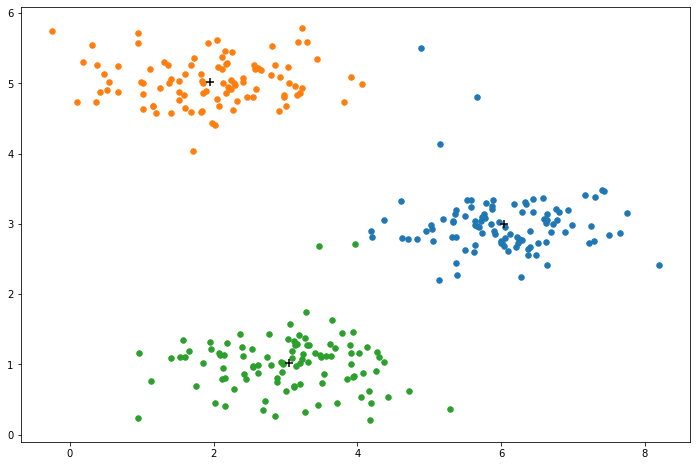

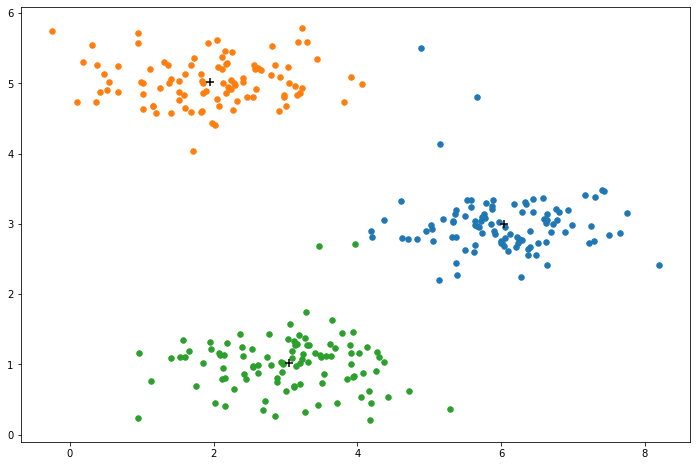

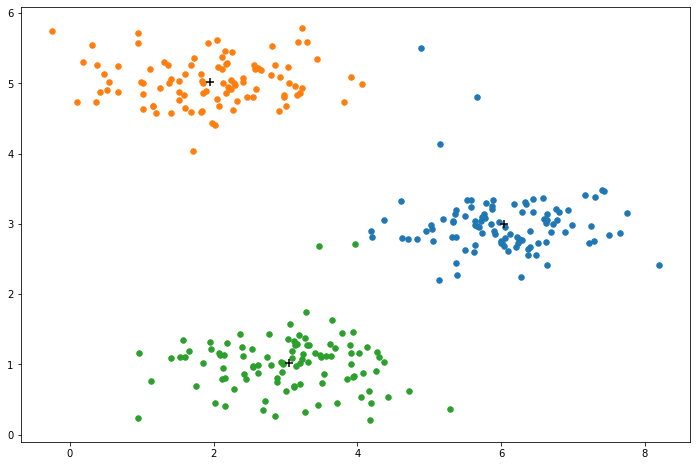

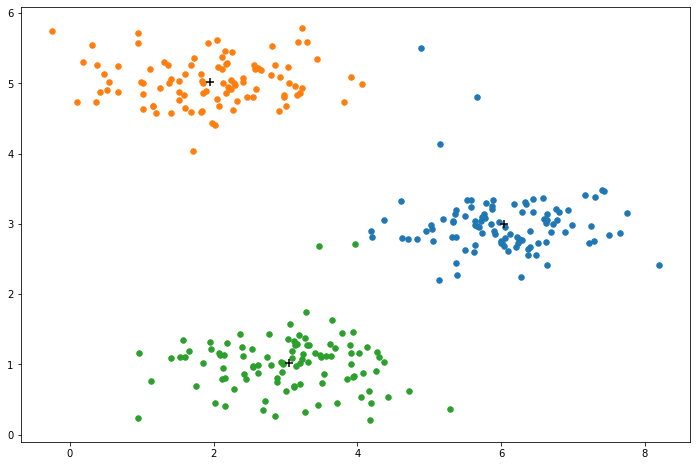

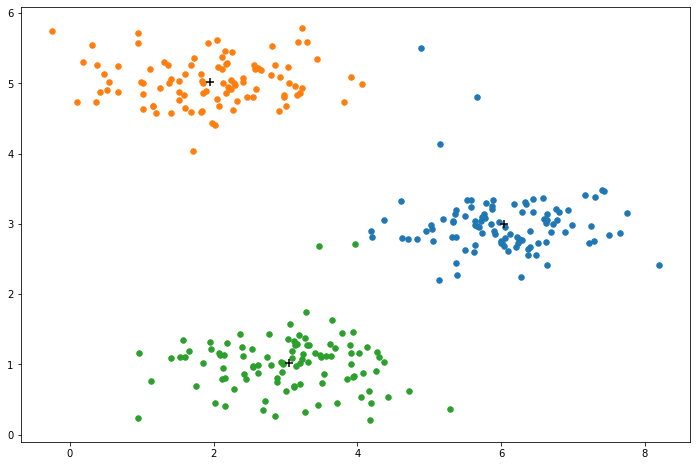

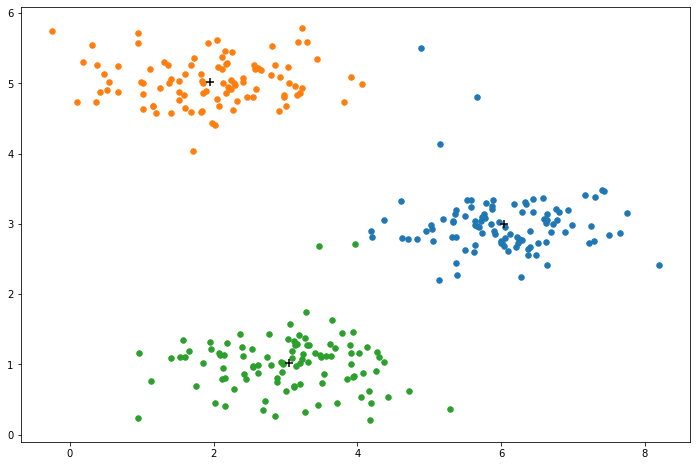

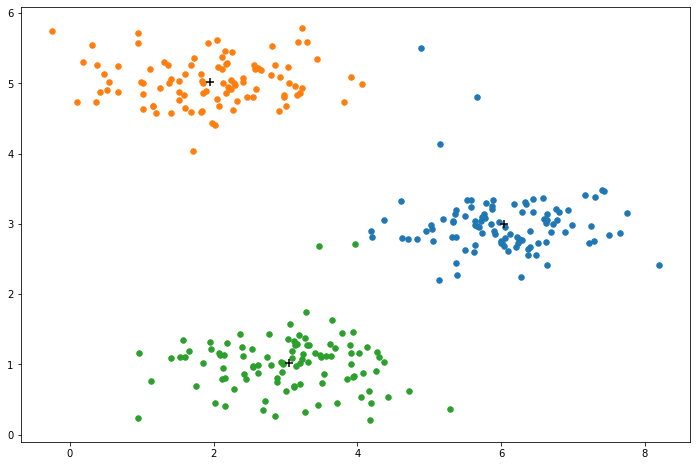

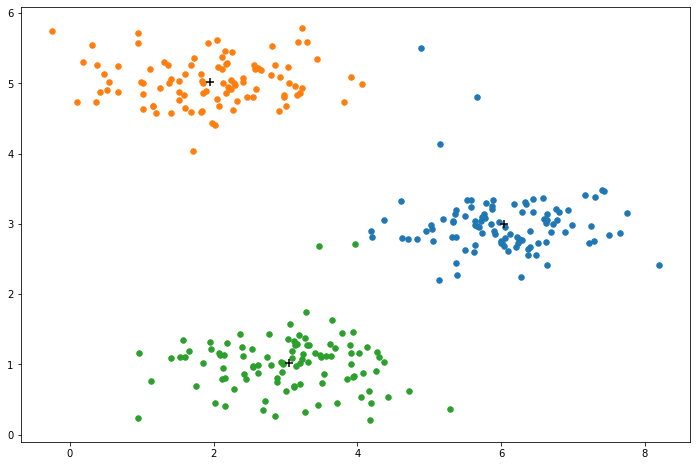

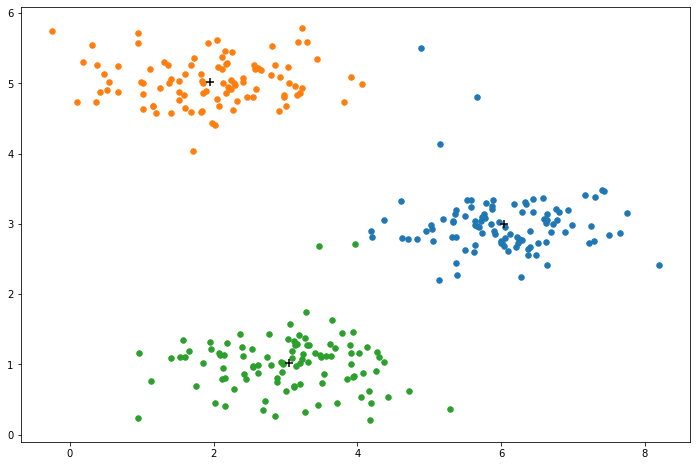

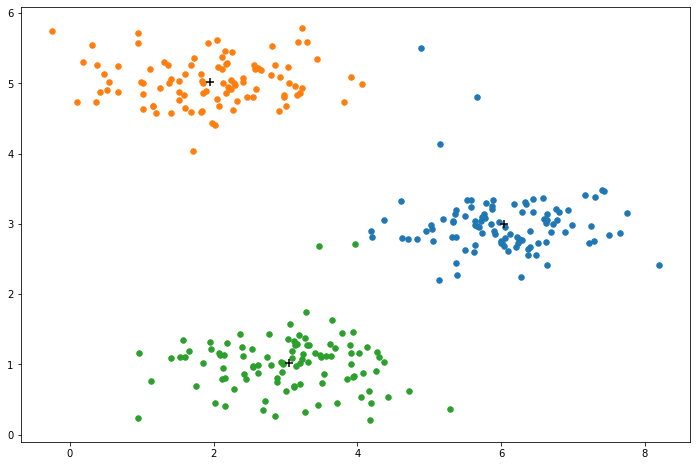

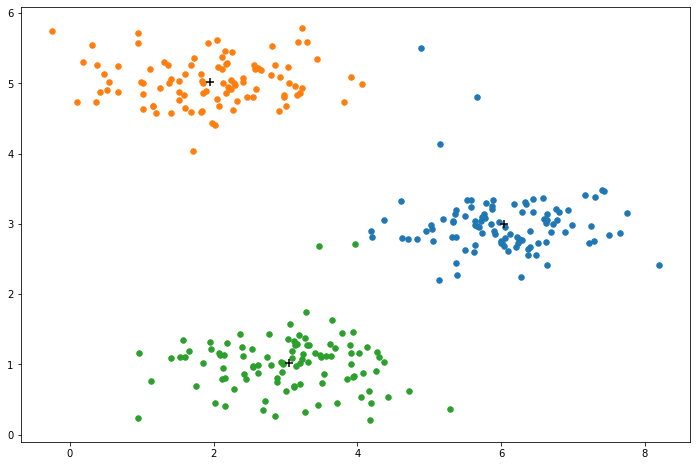

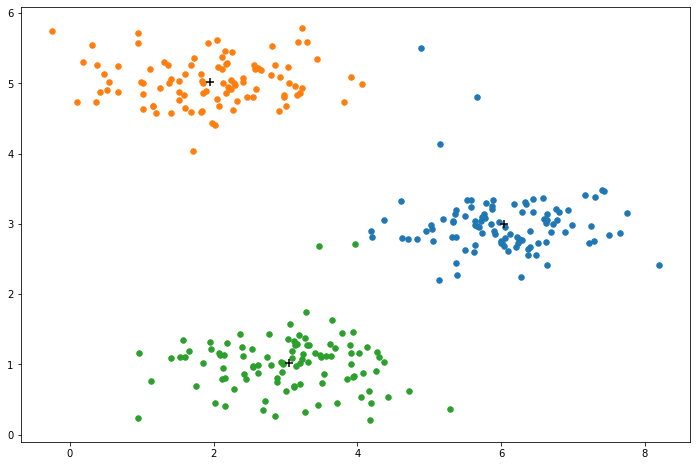

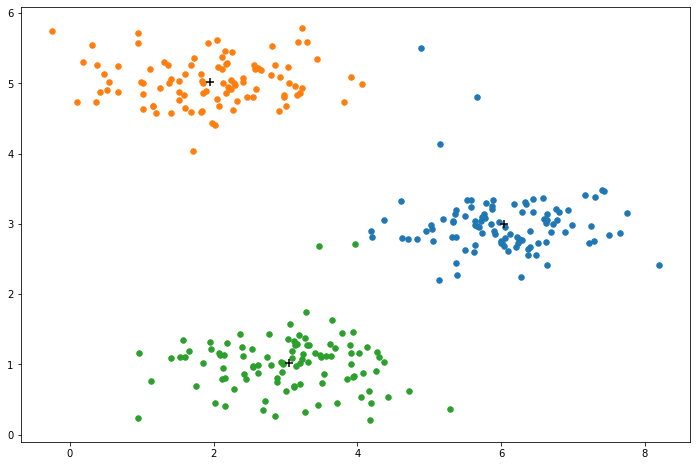

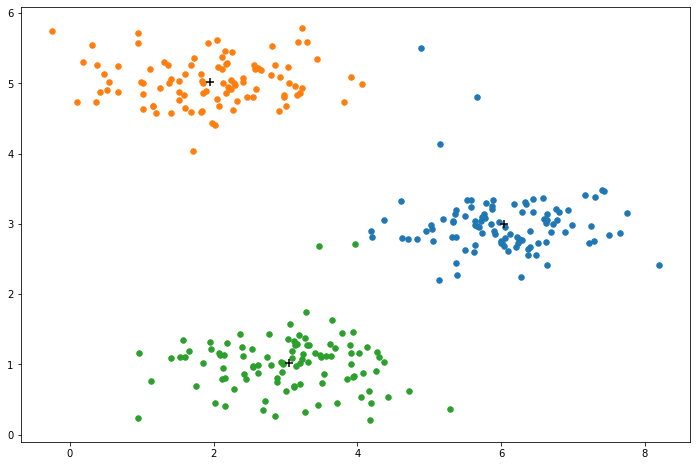

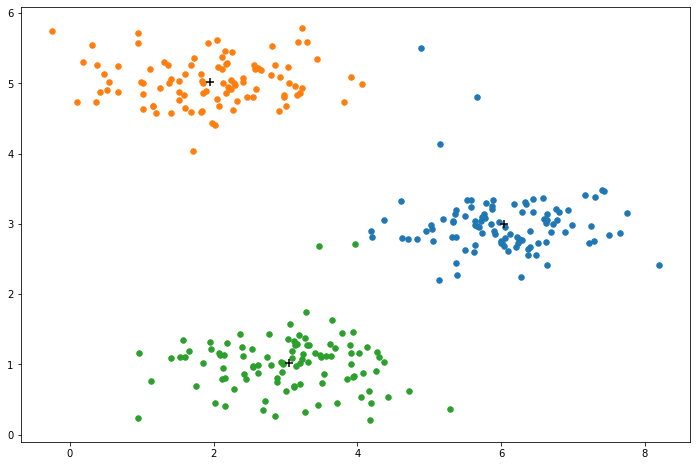

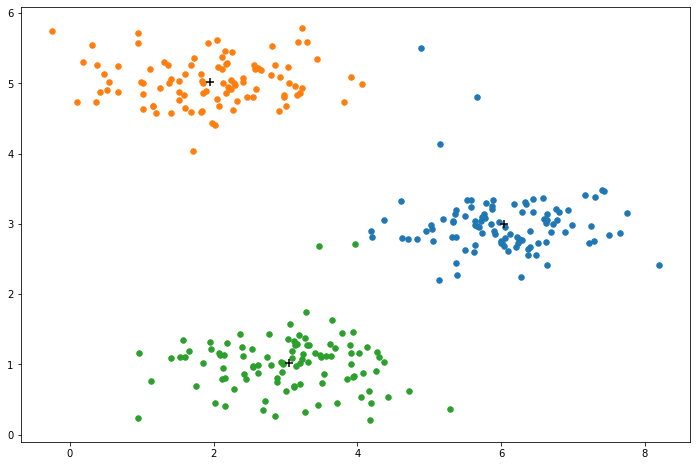

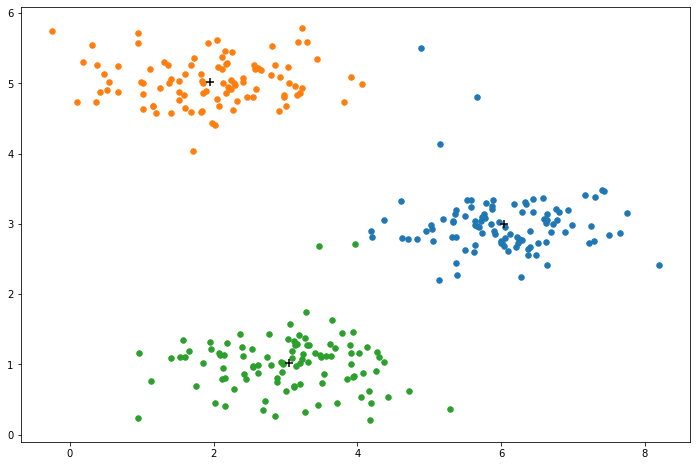

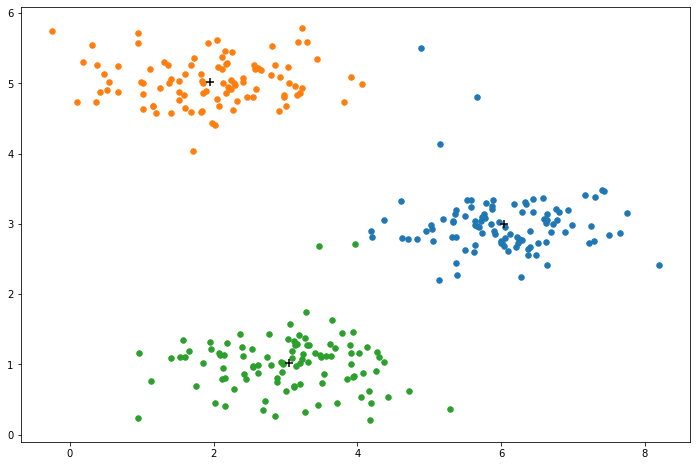

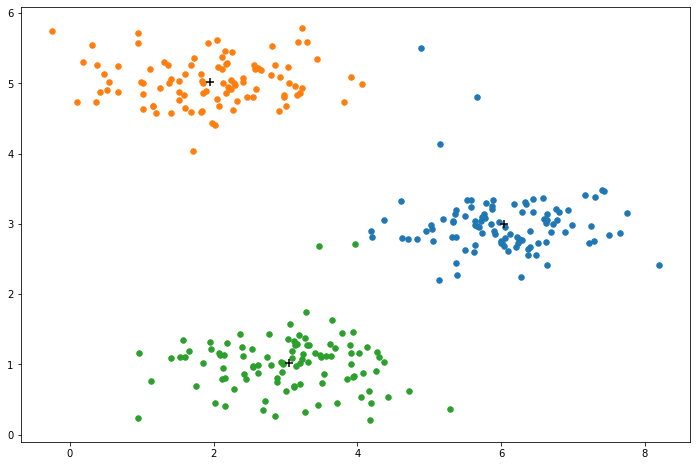

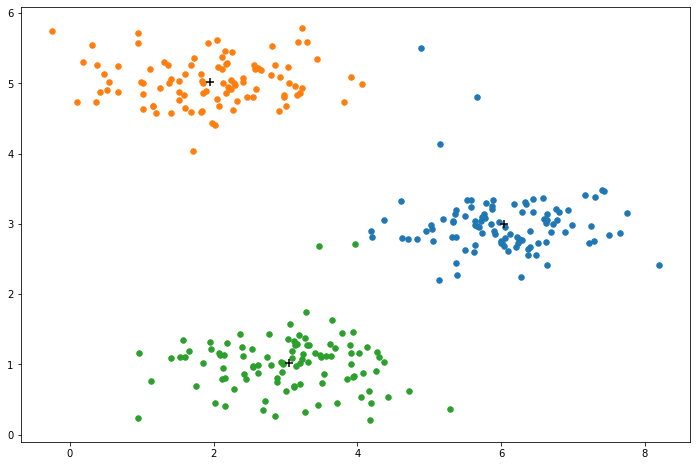

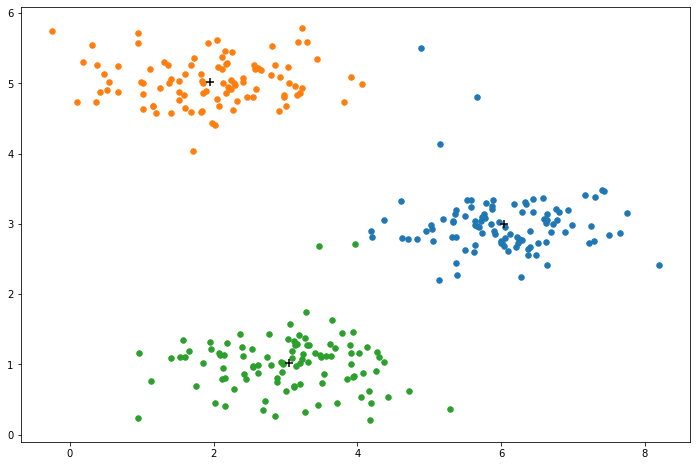

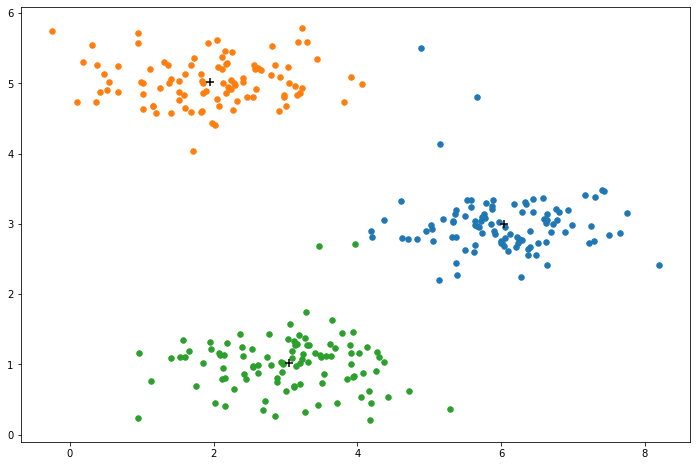

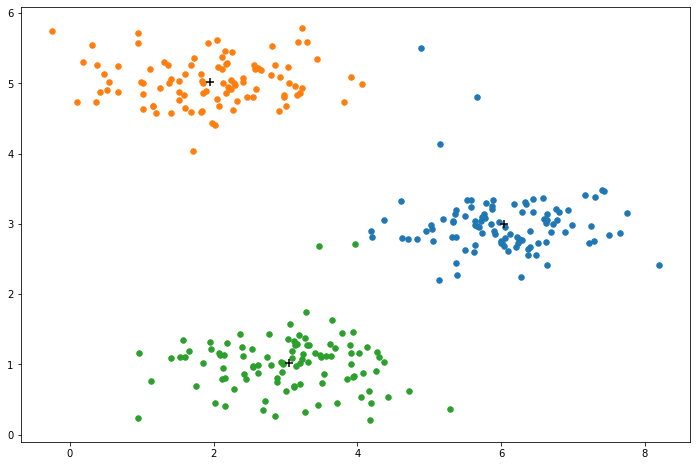

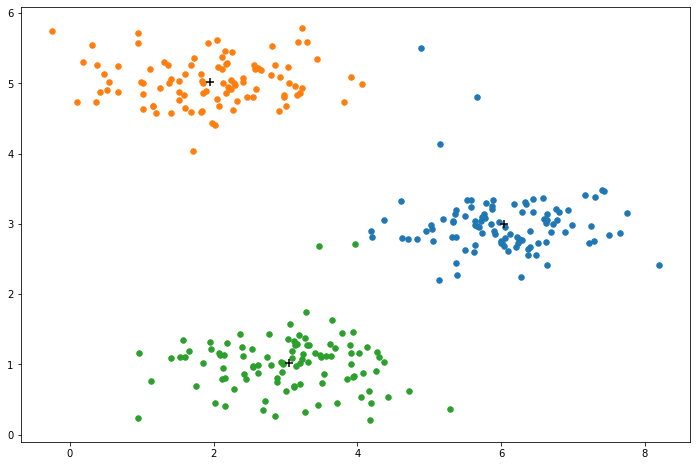

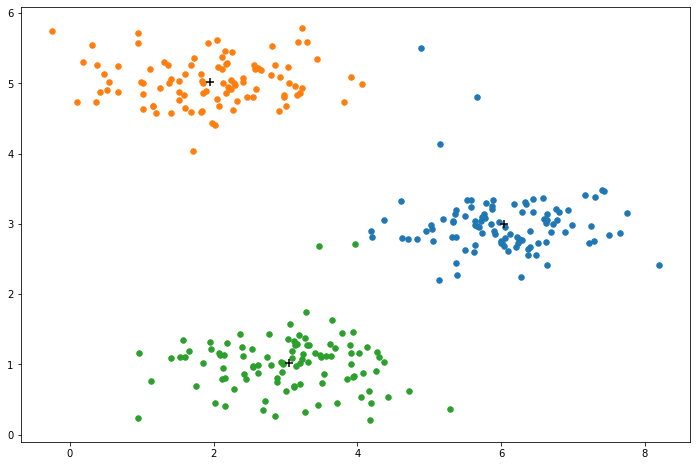

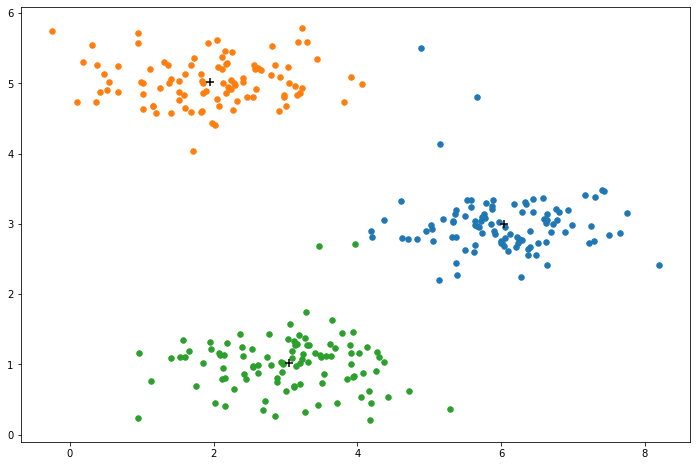

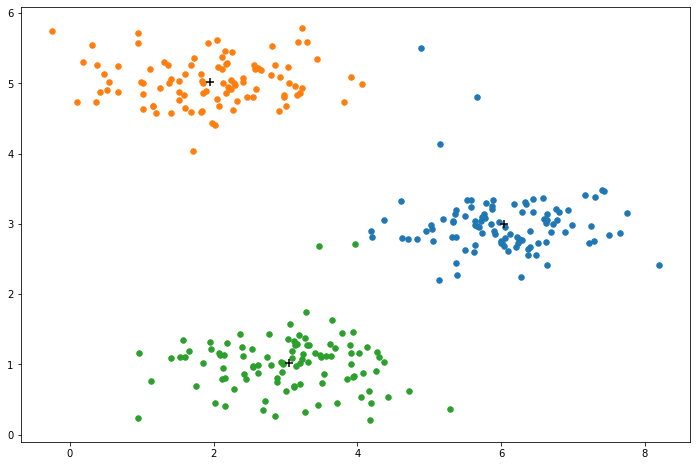

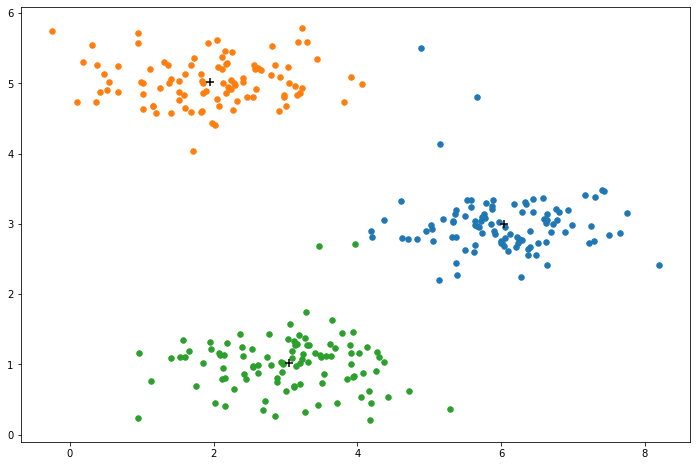

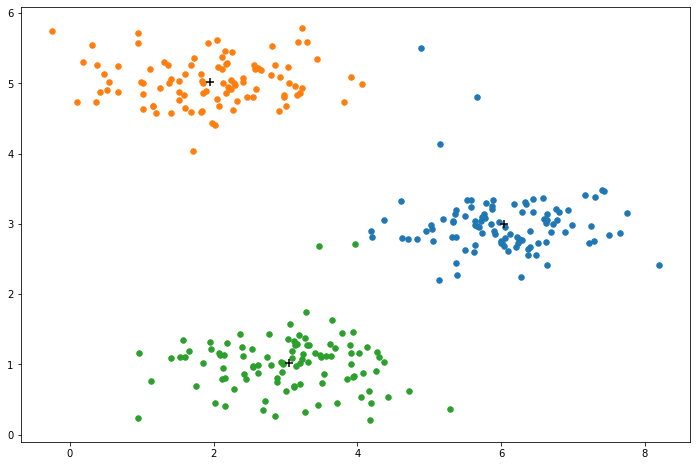

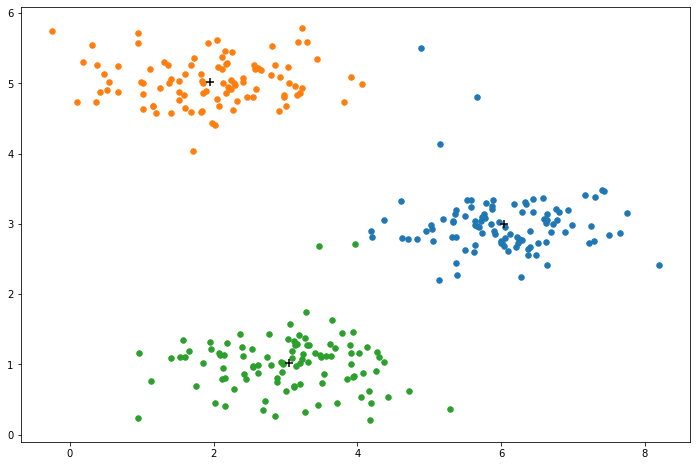

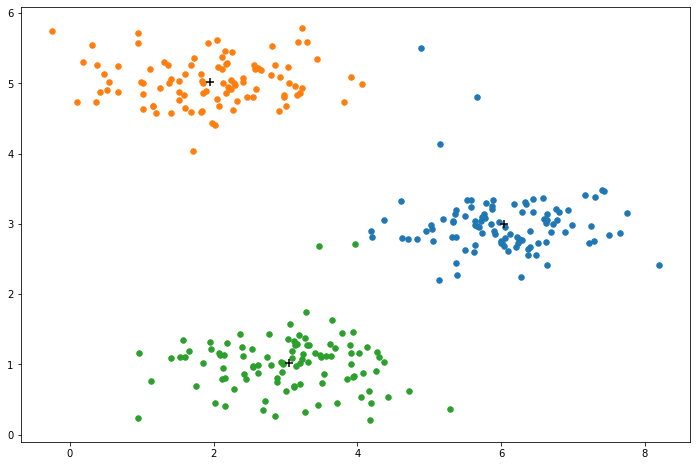

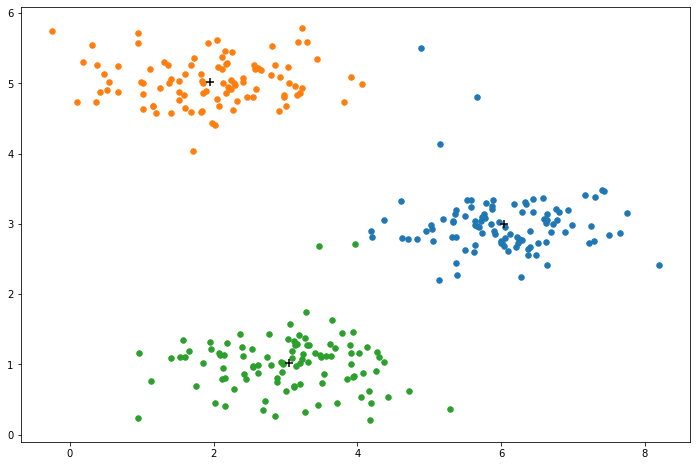

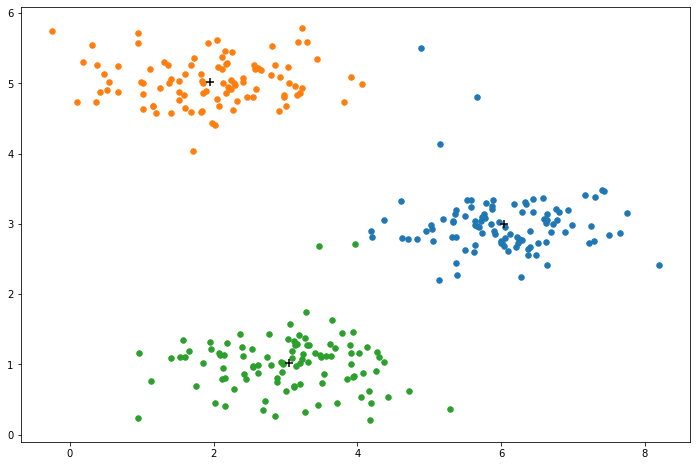

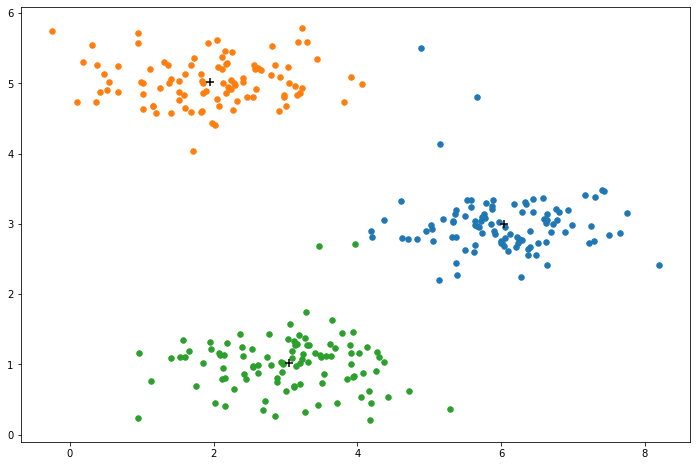

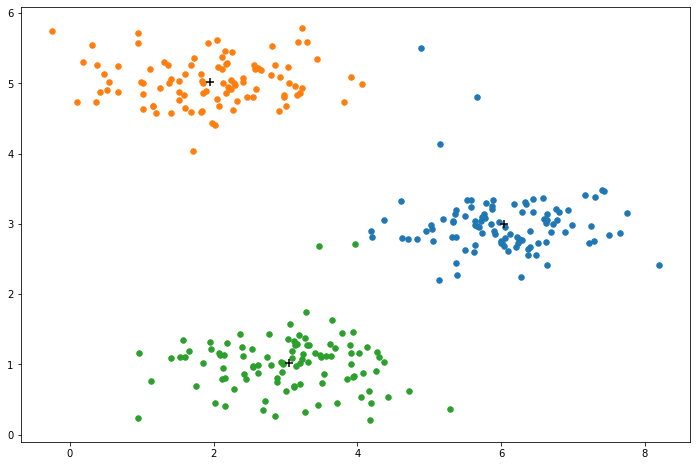

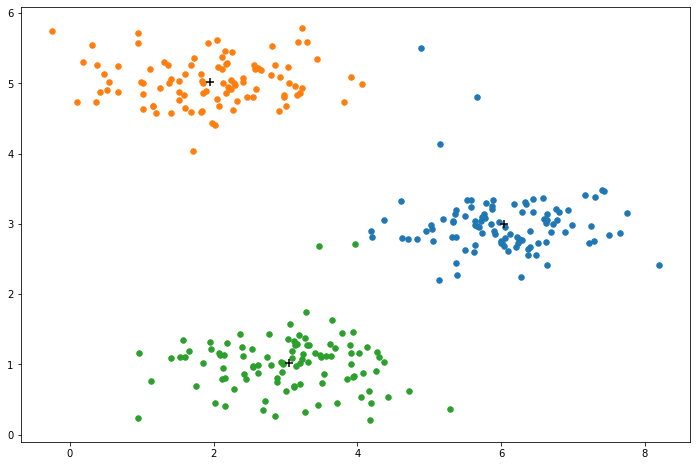

In [11]:
X = data['X']
iters = 50
k = 3
Centroids = kMeansInitCentroids(X, k)
print(Centroids)

for i in range(iters):
    # Cluster assignment
    labels = findClosestCentroids(X, Centroids)
    # after get the labels, we already know where the data points are allocated
    fig, ax = plt.subplots(figsize=(12, 8))
    for j in range(k):
        ax.scatter(X[np.where(labels == j)][:,0],X[np.where(labels == j)][:,1],s=30)
    ax.scatter(Centroids[:,0],Centroids[:,1],s=80,marker='+',c='k')
    plt.show()
    # Modify Centroids
    Centroids = computeCentroids(X, labels, k)
    time.sleep(1)

emmm...看起来不一样了，but,K-means algorithm 就是这样

## 接下来使用K-means完成图片压缩(Image compression)

In [12]:
# 读取图片
data = loadmat('./data/bird_small.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [13]:
data['A'].shape      # 可以看到图片是 3 * 128 * 128格式

(128, 128, 3)

In [14]:
data['A']

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

显示一下图片

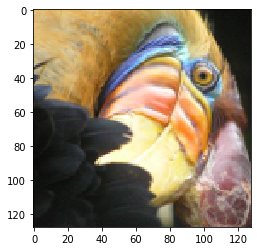

In [15]:
# img = img['A'] / 2 + 0.5     # unnormalize
img = data['A']
img.astype(np.uint8)       # 这里是需要注意的，不然显示不出来
plt.imshow(img)

In [16]:
# 转换矩阵的格式 (128, 128, 3) ---> (128*128, 3)
img = img.reshape(128*128,3)
img.shape

(16384, 3)

In [17]:
img[[0,1,2,3,4]]

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       [223, 185, 105],
       [225, 179, 103]], dtype=uint8)

接下来利用之前实现的K-means算法完成图片压缩

In [18]:
iters = 100
X = img
k = 16
Centroids = kMeansInitCentroids(X, 16)

for i in range(iters):
    labels = findClosestCentroids(X, Centroids)
    
    Centroids = computeCentroids(X, labels, k)
Centroids.shape, labels.shape

((16, 3), (16384,))

In [19]:
Centroids

array([[ 21.73661134,  23.53899154,  20.94393987],
       [150.20353982, 127.69358407, 113.75      ],
       [111.48060942,  79.46121884,  48.34626039],
       [162.33783784, 117.48986486,  51.49099099],
       [ 42.93893591,  42.81076179,  40.54050786],
       [233.86163522, 145.78616352,  64.51362683],
       [ 70.60454545,  66.97045455,  68.59886364],
       [211.0677686 , 190.32561983, 187.80991736],
       [ 98.91481481, 117.00740741, 165.2962963 ],
       [192.15277778, 153.11851852,  85.05277778],
       [145.25099602, 183.87250996, 221.29083665],
       [221.21107872, 182.61282799, 115.86413994],
       [117.80451128,  99.58270677,  90.18922306],
       [178.82366864, 160.50295858, 142.81183432],
       [245.63746224, 218.86002014, 160.61127895],
       [249.14607755, 241.14066727, 208.24256087]])

In [20]:
compressedImg = np.zeros((128,128,3))
compressedImg.shape

(128, 128, 3)

In [21]:
for i in range(128*128):
    row = int(i / 128)
    column = int(i % 128)
    # print(row, column, labels[i])
    compressedImg[row:row+1,column:column+1,:] = Centroids[labels[i],:]

绘图显示压缩后的图片

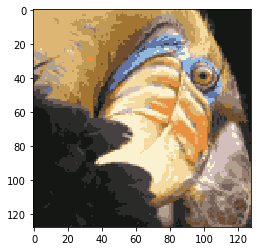

In [22]:
compressedImg = compressedImg.astype(np.uint8)
plt.imshow(compressedImg)

对比一下两张图

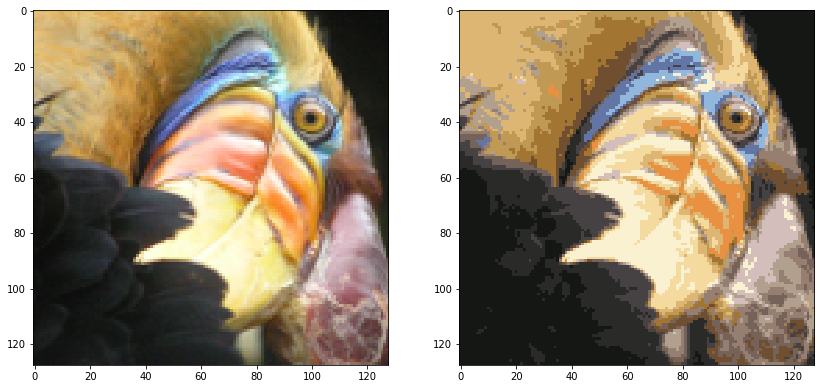

In [28]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].imshow(img.reshape(128,128,3).astype(np.uint8))
ax[1].imshow(compressedImg)
plt.show()

# 2.Principal Component Analysis